<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_09/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09



<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs, make_circles, make_classification


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_09/data/BC.csv", sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0}) # target 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:

1. Realice un análisis exploratorio del conjunto de datos.
1. Normalizar las variables numéricas con el método **StandardScaler**.
3. Realizar un método de reducción de dimensionalidad visto en clases.
4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.




ANÁLISIS EXPLORATORIO

Empezemos por revisar el checklist del fenómeno en estudio

1. ¿ Qué pregunta (s) estás tratando de resolver (o probar que estás equivocado)?
- El objetivo es verificar si los datos de un paciente (sin considerar el diagnóstico) pueden ser relacionados a un determinado diagnóstico. Pues de ser así se podrían generar una predicción de como se agrupan los pacientes en función de estos datos.

2. ¿ Qué tipo de datos tienes ?

- Los tipos de variables que tiene el conjunto de datos son:

  - Categóricas: id y diagnosis 
  - Numéricas: todas las demás.

In [4]:
# Procesamos los datos, partiendo por limpiarlos

for columna in df:
  df[columna].fillna(df[columna].mean(), inplace=True) # Nos aseguramos de reemplazar los valores nulos por el promedio

# Y con eso bastaría, pues en general los datos están limpios

In [5]:
# Empezamos con una análisis descriptivo simple

df.drop(columns = ["id", "diagnosis"]).describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# Veamos los tipos de datos que tenemos

df.dtypes

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
# Luego, a modo de resumen, veamos cuantos valores único hay por columna, sin contar la id y el diagnóstico

lista = []

for col in df.drop(columns = ["id", "diagnosis"]).columns: 
  # Hacemos un resumen por columna
  pd_series = df[col]
    
  # elementos distintos 
  l_unique = pd_series.unique()
    
  # elementos vacios
  l_vacios = pd_series[pd_series.isna()]
    
  aux_df = pd.DataFrame({
      'columna': [col],
      'unicos': [len(l_unique)],
      'vacios': [len(l_vacios)]
  })
  lista.append(aux_df)
    
df_info = pd.concat(lista).reset_index(drop=True)
df_info['% vacios'] = df_info['vacios']/len(df)
df_info.T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
columna,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
unicos,456,479,522,539,474,537,537,542,432,499,...,457,511,514,544,411,529,539,492,500,535
vacios,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
% vacios,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[Text(0, 0, 'smoothness_worst'),
 Text(0, 0, 'symmetry_mean'),
 Text(0, 0, 'radius_mean'),
 Text(0, 0, 'radius_worst'),
 Text(0, 0, 'smoothness_mean'),
 Text(0, 0, 'texture_mean'),
 Text(0, 0, 'concave points_worst'),
 Text(0, 0, 'symmetry_se'),
 Text(0, 0, 'fractal_dimension_mean'),
 Text(0, 0, 'symmetry_worst'),
 Text(0, 0, 'concave points_se'),
 Text(0, 0, 'texture_worst'),
 Text(0, 0, 'perimeter_worst'),
 Text(0, 0, 'texture_se'),
 Text(0, 0, 'perimeter_mean'),
 Text(0, 0, 'area_se'),
 Text(0, 0, 'compactness_worst'),
 Text(0, 0, 'perimeter_se'),
 Text(0, 0, 'concavity_se'),
 Text(0, 0, 'fractal_dimension_worst'),
 Text(0, 0, 'concavity_mean'),
 Text(0, 0, 'compactness_mean'),
 Text(0, 0, 'concavity_worst'),
 Text(0, 0, 'area_mean'),
 Text(0, 0, 'radius_se'),
 Text(0, 0, 'compactness_se'),
 Text(0, 0, 'concave points_mean'),
 Text(0, 0, 'area_worst'),
 Text(0, 0, 'fractal_dimension_se'),
 Text(0, 0, 'smoothness_se')]

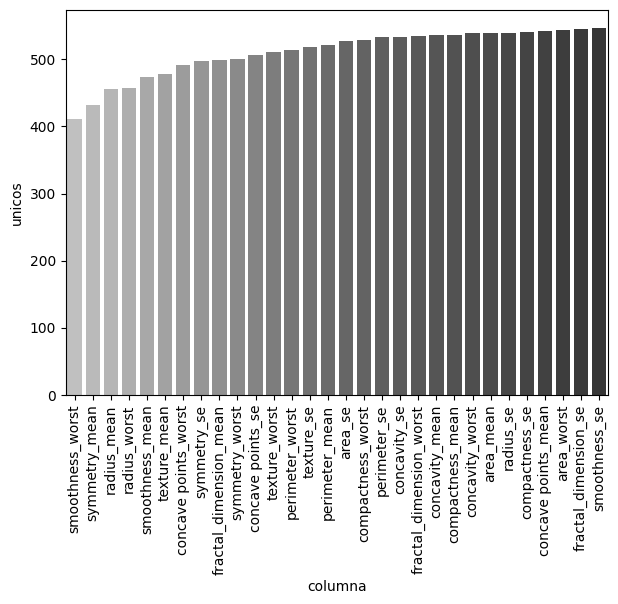

In [8]:
# Graficamos nuestro resumen

plt.style.use('default')
plt.figure(figsize=(7,5))

plotting = sns.barplot(
    x="columna",
    y="unicos",
    data=df_info.sort_values('unicos'),
    palette="Greys_d",
    linewidth=3
)

plotting.set_xticklabels(plotting.get_xticklabels(), rotation=90)


3. ¿Qué falta en los datos y cómo los maneja?

- Se puede apreciar que en general no se repiten tanto los datos en cada columna y estos están libres de contaminación.

4. ¿Qué hacer con los datos faltantes, outliers o información mal inputada?

- Los datos faltantes se reemplazan por el promedio de su respectiva columna y a los outliers no se les hará nada, puesto que más adelante se verá que en este caso no afectan nuestro estudio.

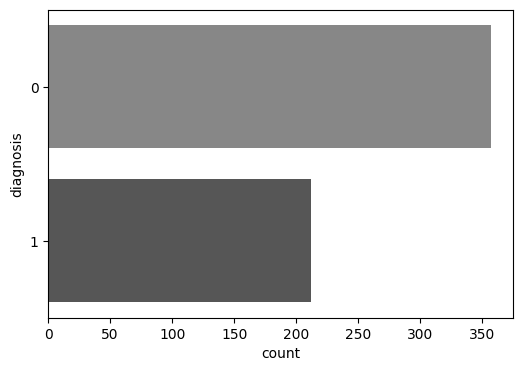

In [9]:
# Sabemos que tenemos dos tipos de diagnóstico que son 1 y 0. Entonces 
# visualizemos cuantos paciente hay por cada uno

plt.style.use('default')
plt.figure(figsize=(6,4))

plotting = sns.countplot(
    y="diagnosis",
    data=df,
    order=df['diagnosis'].value_counts().index,
    palette="Greys_d",
    linewidth=3
)

plt.show()

  Procesamiento de los datos:
  

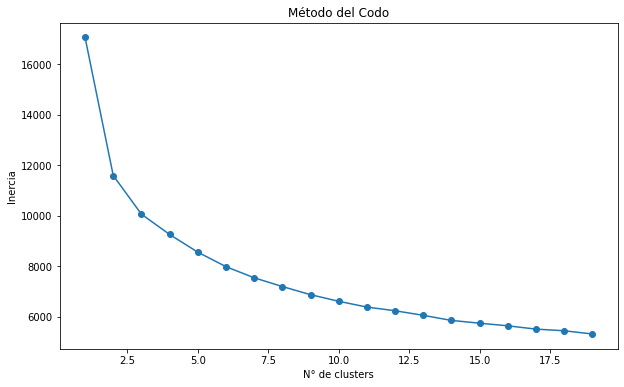

In [10]:
from sklearn.cluster import KMeans

df_aux = df # Para no perderlo

# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

# Aplicamos el algoritmo K-means

indices = [190, 380, 560]
muestra = pd.DataFrame(df.loc[indices], columns=df.keys()).reset_index(drop=True)
df = df.drop(columns = ["id", "diagnosis"])            # Esta información es innecesaria para nuestro análisis.
muestra = muestra.drop(columns = ["id", "diagnosis"])  # Además, le quitamos los diagnósticos, puesto que la idea es
                                                       # la distibuición de los clusters "hable por si sola"
# Normalizamos con el método de StandardScaler

df_esc = StandardScaler().fit_transform(df)
muestra_esc = StandardScaler().fit_transform(muestra)
X = df_esc.copy()

# Buscamos el valor óptimo de K
inercia = []
for i in range(1,20):
  algoritmo=KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10)
  algoritmo.fit(X)
  inercia.append(algoritmo.inertia_)

df = df_aux

# Trazamos la curva de la suma de errores cuadráticos
# y verificamos por regla del codo la cantidad óptima de clusters
plt.figure(figsize=[10,6])
plt.title("Método del Codo")
plt.xlabel("N° de clusters")
plt.ylabel("Inercia")
plt.plot(list(range(1,20)), inercia, marker="o")
plt.show()

Notemos que a partir de 5 clusters la suma de los errores cuadráticos va disminuyendo más despacio.

In [11]:
# Aplicamos para 5 clusters
algoritmo=KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10)
algoritmo.fit(X)

KMeans(n_clusters=5)

In [12]:
# Con las etiquetas de los centroides, podemos identificar en que cluster esta cada registro (paciente)
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_
df_aux = pd.DataFrame(data=etiquetas)
df_etq = pd.concat([df_aux, df], axis=1, sort=False).rename(columns={0 : "cluster"})
df_etq.head()

,cluster,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,2,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,4,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,2,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


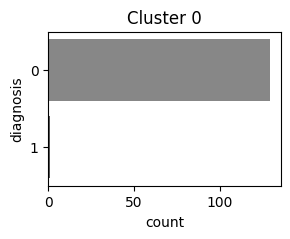

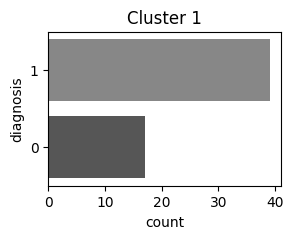

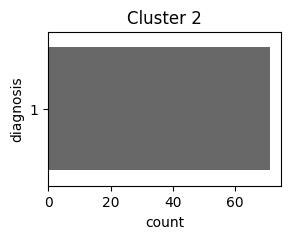

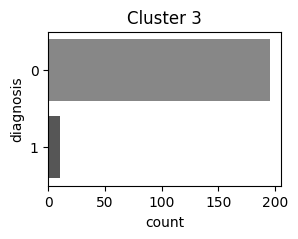

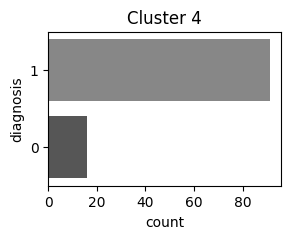

In [13]:
# Ahora visualizemos que diagnóstico es más probable que tenga un paciente en función del grupo
# al cual pertenecen sus datos  

for i in range(0,5):
  df_aux = df_etq[df_etq["cluster"]==i]
  plt.style.use('default')
  plt.figure(figsize=(3,2))
  plotting = sns.countplot(
      y="diagnosis",
      data=df_aux,
      order=df_aux["diagnosis"].value_counts().index,
      palette="Greys_d",
      linewidth=3
  )
  plt.title("Cluster "+str(i))
  plt.show()

Se puede apreciar que si un paciente pertenece al grupo del cluster 0, 2 o el 4 probablemente su diagnóstico sea del tipo "1". En caso contrario, si el paciente pertenece al grupo del cluster 1 o 3, probablemente pertenezca al diagnóstico tipo "0"


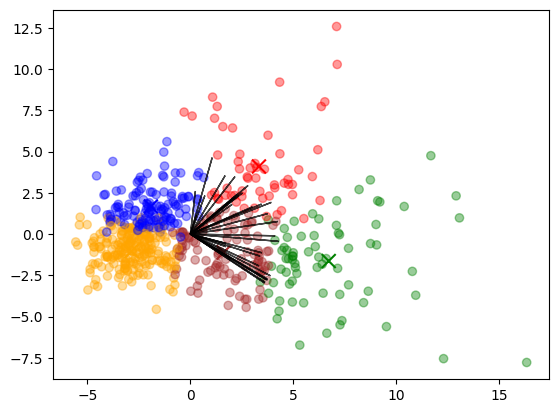

In [14]:
# Ahora, veamos una reducción dimensional a 2 componentes para los centroides

modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X)
centroides_pca = modelo_pca.transform(centroides)

# Se define los colores de cada cluster
colores = ["blue", "red", "green", "orange", "brown"]

# Se asignan los colores a cada cluster
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]

# Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, marker = "o", 
            alpha = 0.4)

# Se grafica los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], marker = "x", 
            s = 100, linewidths = 3, c = colores)

# Se guardan los datos en una variable
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = df.drop(columns = ["id", "diagnosis"]).columns

for i in range(len(columnas)):
  # Se grafican los vectores que representan cada dimensión del conjunto de observaciones
  plt.arrow(0,0,xvector[i], yvector[i], color = "black", 
            width = 0.0000005, head_width = 0.01, alpha = 0.75)

plt.show()


5. ¿Se puede sacar más provecho a los datos?
- Ya se pudo apreciar la relación buscada, entonces, por ejemplo si no sabemos el diagnostico de un paciente, pero si tenemos sus otros datos, podemos determinar en que grupo esta (el más cercano) y asi definir que tan probable es que tenga un diagnóstico u otro.  

In [15]:
# A modo de ilustración, apliquemos lo dicho a los mismos pacientes del conjunto de datos en estudio

df_aux = pd.DataFrame() # Creamos un dataframe auxiliar 

# df_aux será como df pero restringido a "id", "diagnosis", "cluster" y además con otra columna extra que será la probabilidad de
# de estar en un diagnóstico en función del cluster 

for cluster in range(0,centroides.shape[0]):
  df1 = df_etq[(df_etq["diagnosis"]==0) & (df_etq["cluster"]==cluster)][["id", "diagnosis", "cluster"]]
  df1 = df1.assign(per=lambda x: df1.shape[0]*100/df_etq[df_etq["cluster"]==cluster].shape[0]).drop(columns = ["cluster"])    
  
  df2 = df_etq[(df_etq["diagnosis"]==1) & (df_etq["cluster"]==cluster)][["id", "diagnosis", "cluster"]]
  df2 = df2.assign(per=lambda x: df2.shape[0]*100/df_etq[df_etq["cluster"]==cluster].shape[0]).drop(columns = ["cluster"])
  df_aux = pd.concat([df_aux, pd.concat([df1,df2])])

diag_predict = df_aux.pivot_table(index="diagnosis", columns="id", values="per")

for id in diag_predict:
  diag_predict[id].fillna(100-diag_predict[id].mean(), inplace=True) # diag_predict tendrá valores nan, ya que cada paciente solo pertenece a 
                                                                     # un diagnóstico a la vez, pero puede arreglarse, pues al otro diagnóstico
                                                                     # le agregamos la probabilidad faltante, respecto de cada persona

diag_predict # Aquí se puede ver la probabilidad que tiene cada paciente de estar en un diagnóstico u otro.

id,8670,8913,8915,9047,85715,86208,86211,86355,86408,86409,...,871001502,881046502,881094802,901034301,901034302,911157302,911296201,911296202,911320501,911320502
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,14.953271,95.121951,14.953271,95.121951,30.357143,0.0,99.230769,0.0,99.230769,30.357143,...,30.357143,0.0,30.357143,99.230769,95.121951,0.0,14.953271,0.0,95.121951,95.121951
1,85.046729,4.878049,85.046729,4.878049,69.642857,100.0,0.769231,100.0,0.769231,69.642857,...,69.642857,100.0,69.642857,0.769231,4.878049,100.0,85.046729,100.0,4.878049,4.878049


Es razonable pensar que mientras más grande sea la muestra en estudio, los resultados son más confiables, por lo tanto la utilidad de esto es en permitir hacer una predicción temprana de un diagnóstico (siempre considerando que solo es un margen de probabilidad).  

Ahora, utilizaremos un modelo de clasificación llamado "RandomForest" donde nuestra variable categórica objetivo será la misma de antes ("diagnosis")

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

bosque = RandomForestClassifier()
bosque.get_params()
parametros = {"criterion" : ("gini", "entropy"), 
              "n_estimators" : (10, 20, 30),
              "max_samples" : (1/3, 2/3)}
d={}
métricas = ["accuracy", "recall", "precision"]
d["métricas"] = métricas
for llave, _ in parametros.items():
  d[llave] = []
d["best_score"] = []

for métrica in métricas:
  rejilla = GridSearchCV(bosque, parametros, scoring = métrica)
  rejilla.fit(df.drop(columns = ["diagnosis", "id"]).values, df["diagnosis"].values)
  for llave, _ in parametros.items():
    d[llave].append(rejilla.best_params_[llave])
  d["best_score"].append(rejilla.best_score_)

resultados = pd.DataFrame(d)
resultados 

,métricas,criterion,n_estimators,max_samples,best_score
0,accuracy,gini,20,0.666667,0.959603
1,recall,entropy,30,0.666667,0.929568
2,precision,gini,20,0.666667,0.984994


In [17]:
def mae(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute error (MAE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.abs(error).mean(), 4)


def mse(targets, predictions) -> float:
    """
    Calculo de la metrica: mean squared error (MSE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round((error ** 2).mean(), 4)


def rmse(targets, predictions) -> float:
    """
    Calculo de la metrica: root mean squared error (RMSE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.sqrt((error ** 2).mean()), 4)


# b) Percentage errors

def mape(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute percentage error (MAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets

    if any(x == 0 for x in targets):
        return np.inf
    else:
        return round(np.abs(error / targets).mean(),4)


def maape(targets, predictions) -> float:
    """
    Calculo de la metrica:  mean arctangent percentage error  (MAAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """

    error = predictions - targets

    if any((x, y) == (0, 0) for x, y in zip(predictions, targets)):
        return np.inf

    else:
        return round(np.arctan(np.abs(error / targets)).mean(),4)


def wmape(targets, predictions) -> float:
    """
    Calculo de la metrica:  weighted mean absolute percentage error (WMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    sum_values = np.sum(targets)

    if sum_values == 0:
        return np.inf
    else:
        return round(np.abs(error).sum() / sum_values,4)


def mmape(targets, predictions) -> float:
    """
    Calculo de la metrica: modified mean absolute percentage error (MMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = np.abs(predictions - targets)
    denom = 1 + np.abs(targets)

    return round(np.mean(error / denom),4)


def smape(targets, predictions) -> float:
    """
    Calculo de la metrica: symmetric mean absolute percentage error (SMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    sum_values = np.abs(predictions) + np.abs(targets)

    if any(x == 0 for x in sum_values):
        return np.inf

    else:
        return round(2 * np.mean(np.abs(error) / sum_values),4)

def summary_metrics(df) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mae(y_true, y_pred), 4)]
    df_result['mse'] = [round(mse(y_true, y_pred), 4)]
    df_result['rmse'] = [round(rmse(y_true, y_pred), 4)]

    df_result['mape'] = [round(mape(y_true, y_pred), 4)]
    df_result['maape'] = [round(maape(y_true, y_pred), 4)]
    df_result['wmape'] = [round(wmape(y_true, y_pred), 4)]
    df_result['mmape'] = [round(mmape(y_true, y_pred), 4)]
    df_result['smape'] = [round(smape(y_true, y_pred), 4)]

    # nombre del modelo por defecto
    #try:
    #    model = df['model'][0]
    #    df_result['model'] = [model]
    #except:
    #    df_result['model'] = ['---']

    return df_result

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = df.drop(columns = ["id", "diagnosis"])
Y = df["diagnosis"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2) # split dataset

df_aux = pd.DataFrame()
df_metrics = pd.DataFrame()

for bol in [True, False]:     # Variamos nuestros 
  for iter in [10, 50, 100]:  # parámetros
    rlog = LogisticRegression(fit_intercept = bol, max_iter = iter)
    rlog.fit(X_train, Y_train) # ajustando el modelo
    y_true = list(Y_test)
    y_pred = list(rlog.predict(X_test))
    df_aux = pd.concat([df_aux, pd.DataFrame({'y':y_true,'yhat':y_pred})]) 
    df_metrics = pd.concat([df_metrics, summary_metrics(df_aux)])

df_metrics # Se muestran los valores de las métricas

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,mae,mse,rmse,mape,maape,wmape,mmape,smape
0,0.0965,0.0965,0.3106,inf,inf,0.2444,0.0746,inf
0,0.0965,0.0965,0.3106,inf,inf,0.2444,0.0746,inf
0,0.0906,0.0906,0.3011,inf,inf,0.2296,0.0702,inf
0,0.0921,0.0921,0.3035,inf,inf,0.2333,0.0713,inf
0,0.0912,0.0912,0.3020,inf,inf,0.2311,0.0702,inf
0,0.0892,0.0892,0.2986,inf,inf,0.2259,0.0687,inf
